In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt


(0, 74)

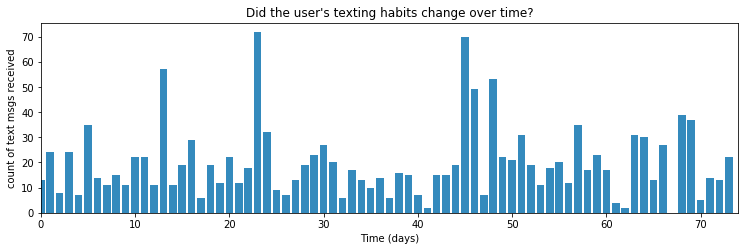

In [9]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color ="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [19]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data-1)
    
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)   
    
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling 2 chains: 100%|████████████████████████████████████████████████████| 30000/30000 [00:18<00:00, 1586.89draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [22]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

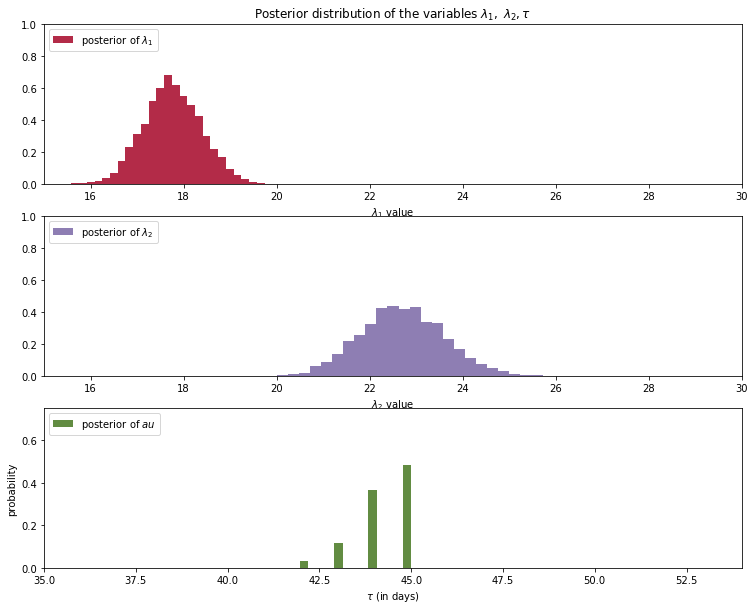

In [46]:
figsize(12.5, 10)
#histogram of the samples
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled',
         bins=30, alpha=0.85,
        label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distribution of the variables $\lambda_1, \;\lambda_2,\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
        label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

ax = plt.subplot(313)
ax.set_autoscaley_on(False)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, histtype = 'stepfilled', bins=30, alpha=0.85,
        label="posterior of $\tau$", color="#467821",weights=w, rwidth=2.)

plt.legend(loc="upper left")
plt.ylim([0, 0.75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [20]:
lambda_1_samples

NameError: name 'lambda_1_samples' is not defined